##Markov Chains

###### Adapted From http://firsttimeprogrammer.blogspot.com/

In [1]:
# Necessary imports
import numpy as np
import random as rm

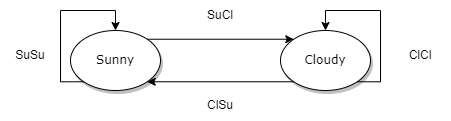

In [1]:
# Let's define the statespace
states = ["Sunny","Cloudy"]

# Possible sequences of events
transitionName = [["SuSu","SuCl"],["ClSu","ClCl"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.8,0.2],
                    [0.5,0.5]]

# Check that probabilities add to 1. If not, raise ValueError
if sum(transitionMatrix[0])!=1 or sum(transitionMatrix[1]) != 1:
    print("Error!!!! Probabilities MUST ADD TO 1. Check transition matrix!!")
    raise ValueError("Probabilities MUST ADD TO 1")

In [3]:
# A functions which implements the Markov model to forecast the weather
def weatherForecast(days, weatherToday = None):
    rm.seed()
    if weatherToday is None:
      weatherToday = 'Cloudy' if rm.random()<0.5 else 'Sunny'
    output = weatherToday
    i = 1
    print("Starting weather: ",weatherToday)
    while i < days:
        if weatherToday == "Sunny":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SuSu":
                pass
            else:
                weatherToday = "Cloudy"
        elif weatherToday == "Cloudy":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "ClCl":
                pass
            else:
                weatherToday = "Sunny"
        output+= ' ' + weatherToday
        i += 1
    return output

### Stationary probabilities given starting point


##### Random sequence

In [37]:
# We forecast the weather for 100 days
forecast = weatherForecast(100, 'Sunny')
print(forecast)
pSunny = forecast.count('Sunny')/100
pCloudy = forecast.count('Cloudy')/100
print([pSunny,pCloudy])

Starting weather:  Sunny
Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Cloudy Cloudy Sunny Sunny Sunny Sunny Sunny Cloudy Cloudy Sunny Cloudy Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Cloudy Cloudy Cloudy Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Cloudy Cloudy Sunny Sunny Sunny Sunny Cloudy Cloudy Cloudy Cloudy Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Sunny Cloudy Cloudy Cloudy Sunny Sunny Sunny Cloudy Cloudy Sunny Sunny Cloudy Cloudy Cloudy Cloudy Sunny Sunny Sunny Sunny Cloudy Cloudy Sunny Cloudy Sunny
[0.74, 0.26]


##### Simulated Run

In [38]:
n=100000
forecast = weatherForecast(n, 'Cloudy')
p = []
for st in states:
  p.append(forecast.count(st)/n)
print(p)

Starting weather:  Cloudy
[0.71562, 0.28438]


##### Vector Multiplication

In [39]:
y = [1,0] # Sunny 
for i in range(0,100000):
  y=np.matmul(y,transitionMatrix)
print(y)

[0.71428571 0.28571429]
